In [2]:
# imports

import pandas as pd
import numpy as np
from scipy.stats import trim_mean   # conda install scipy
from statsmodels import robust      # conda install -c conda-forge statsmodels 
import wquantiles                   # pip install wquantiles

import seaborn as sns
import matplotlib.pylab as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
csv_city = pd.read_csv('data/diamonds_city.csv')
csv_clarity = pd.read_csv('data/diamonds_clarity.csv')
csv_color = pd.read_csv('data/diamonds_color.csv')
csv_cut = pd.read_csv('data/diamonds_cut.csv')
csv_dimensions = pd.read_csv('data/diamonds_dimensions.csv')
csv_properties = pd.read_csv('data/diamonds_properties.csv')
csv_transactional = pd.read_csv('data/diamonds_transactional.csv')


"""diamonds_city.csv
diamonds_clarity.csv
diamonds_color.csv
diamonds_cut.csv
diamonds_dimensions.csv
diamonds_properties.csv
diamonds_transactional.csv"""

'diamonds_city.csv\ndiamonds_clarity.csv\ndiamonds_color.csv\ndiamonds_cut.csv\ndiamonds_dimensions.csv\ndiamonds_properties.csv\ndiamonds_transactional.csv'

# Observamos que tiene cada csv

In [4]:
csv_city

city_id           city
0   0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...      Amsterdam
1   1e73b1647343b286269d517e6f07e6e07ccef10cd7b785...         Zurich
2   2bd25cd960aba8b706e2b67f2bb38b750ee5384b0e9883...      Las Vegas
3   5a59ef2e40c5f89adb8c0c6ad0a8019b0e252fff530cf2...  New York City
4   5dd272b4f316b776a7b8e3d0894b37e1e42be3d5d3b204...          Paris
5   68371d5bdaab31b5cbc25fbf94b8f9c1238294fc50e715...       Tel Aviv
6   6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...          Dubai
7   89c7286890f7347ab235234e74d406596a127ae3679042...       Kimberly
8   ba04d229e496b8383a4df91f5e77c194a95cf1a069b0b2...          Surat
9   ca3aa21a5b70c3e88cc6336682c8c7da928a0c66a5ead4...        Antwerp
10  e9c722cbefc2f055ae60b4e2cbe73a2d99537eab0c37f3...         Madrid
11  ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...         London
12  ed76f191621cf6ed77eab6a8013d1cb4bdfa89a75a24aa...     Luxembourg

In [5]:
csv_clarity

clarity_id clarity
0  03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...     SI2
1  3f9db06236e9719b61c826b612b882fa702ec81574e44c...    VVS2
2  66686ae1f0c9c400ba32dc600a34ff0aa173395bcbc2d8...    VVS1
3  7020fd7aaf1656dea5c0c0c3d4bb5a28ebf6243fba95d3...      IF
4  bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...     SI1
5  c2818bc4e5ec4ae4a357a0df6fed73652e169ec676f7d4...      I1
6  ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...     VS1
7  f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...     VS2

In [6]:
csv_color

color_id color
0  333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...     G
1  3f39d5c348e5b79d06e842c114e6cc571583bbf44e4b0e...     D
2  44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...     H
3  6da43b944e494e885e69af021f93c6d9331c78aa228084...     J
4  a83dd0ccbffe39d071cc317ddf6e97f5c6b1c87af91919...     I
5  a9f51566bd6705f7ea6ad54bb9deb449f795582d6529a0...     E
6  f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...     F

In [7]:
csv_cut

cut_id        cut
0  388655e25e91872329272fc10128ef5354b3b19a05d7e8...  Very Good
1  4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...      Ideal
2  c939327ca16dcf97ca32521d8b834bf1de16573d21deda...       Good
3  de88c121a82a06352bf1aaceba20578356408a334ba046...    Premium
4  f7b19afcde965ea4942b878d266f89f8ba9a5a833e60f7...       Fair

In [8]:
csv_dimensions

index_id  depth  table     x  \
0      5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...   62.4   58.0  6.83   
1      6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...   63.0   57.0  4.35   
2      d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...   65.5   55.0  5.62   
3      4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...   63.8   56.0  4.68   
4      4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...   60.5   59.0  6.55   
...                                                  ...    ...    ...   ...   
40450  f0bc79169405ebeb24e308055156b946ffd819db9b4f75...   62.7   57.0  7.10   
40451  339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...   57.1   60.0  8.31   
40452  46957922b99954654c1deb8d854c3f069bf118b2ce9415...   62.7   56.0  6.37   
40453  9d733392d362d5c6f1d9b9659b601c7d4b5a1c1c8df579...   61.9   54.3  4.45   
40454  a02744a70faa594d240b067f21fcc23a8d17cd1098a9fb...   62.0   58.0  6.83   

          y     z  
0      6.79  4.25  
1      4.38  2.75  
2      5.53  3.65  
3      4.72  3.00  
4      6.51  3.95  
...     ...   ...  
40450  7.04  4.43  
40451  8.25  4.73  
40452  6.42  4.01  
40453  4.47  2.76  
40454  6.88  4.25  

[40455 rows x 6 columns]

In [9]:
csv_properties

index_id  \
0      5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...   
1      6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...   
2      d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...   
3      4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...   
4      4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...   
...                                                  ...   
40450  f0bc79169405ebeb24e308055156b946ffd819db9b4f75...   
40451  339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...   
40452  46957922b99954654c1deb8d854c3f069bf118b2ce9415...   
40453  9d733392d362d5c6f1d9b9659b601c7d4b5a1c1c8df579...   
40454  a02744a70faa594d240b067f21fcc23a8d17cd1098a9fb...   

                                                  cut_id  \
0      de88c121a82a06352bf1aaceba20578356408a334ba046...   
1      388655e25e91872329272fc10128ef5354b3b19a05d7e8...   
2      f7b19afcde965ea4942b878d266f89f8ba9a5a833e60f7...   
3      c939327ca16dcf97ca32521d8b834bf1de16573d21deda...   
4      4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...   
...                                                  ...   
40450  4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...   
40451  c939327ca16dcf97ca32521d8b834bf1de16573d21deda...   
40452  4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...   
40453  4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...   
40454  4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...   

                                                color_id  \
0      6da43b944e494e885e69af021f93c6d9331c78aa228084...   
1      44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...   
2      333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...   
3      3f39d5c348e5b79d06e842c114e6cc571583bbf44e4b0e...   
4      333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...   
...                                                  ...   
40450  333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...   
40451  f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...   
40452  44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...   
40453  6da43b944e494e885e69af021f93c6d9331c78aa228084...   
40454  a83dd0ccbffe39d071cc317ddf6e97f5c6b1c87af91919...   

                                              clarity_id  
0      f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...  
1      f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...  
2      ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...  
3      bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...  
4      bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...  
...                                                  ...  
40450  ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...  
40451  03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...  
40452  bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...  
40453  ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...  
40454  bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...  

[40455 rows x 4 columns]

In [10]:
csv_transactional

index_id  price  \
0      5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...   4268   
1      6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...    505   
2      d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...   2686   
3      4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...    738   
4      4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...   4882   
...                                                  ...    ...   
40450  f0bc79169405ebeb24e308055156b946ffd819db9b4f75...  10070   
40451  339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...  12615   
40452  46957922b99954654c1deb8d854c3f069bf118b2ce9415...   5457   
40453  9d733392d362d5c6f1d9b9659b601c7d4b5a1c1c8df579...    456   
40454  a02744a70faa594d240b067f21fcc23a8d17cd1098a9fb...   6232   

                                                 city_id  carat  
0      89c7286890f7347ab235234e74d406596a127ae3679042...   1.21  
1      ca3aa21a5b70c3e88cc6336682c8c7da928a0c66a5ead4...   0.32  
2      ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...   0.71  
3      5a59ef2e40c5f89adb8c0c6ad0a8019b0e252fff530cf2...   0.41  
4      6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...   1.02  
...                                                  ...    ...  
40450  5a59ef2e40c5f89adb8c0c6ad0a8019b0e252fff530cf2...   1.34  
40451  1e73b1647343b286269d517e6f07e6e07ccef10cd7b785...   2.02  
40452  68371d5bdaab31b5cbc25fbf94b8f9c1238294fc50e715...   1.01  
40453  5dd272b4f316b776a7b8e3d0894b37e1e42be3d5d3b204...   0.33  
40454  ca3aa21a5b70c3e88cc6336682c8c7da928a0c66a5ead4...   1.24  

[40455 rows x 4 columns]

# Empezamos a realizar los merge

In [11]:
# en esta celda juntamos todos los dataframes
df = pd.merge(csv_dimensions,csv_properties,how = "left", on = "index_id")
df = pd.merge(df,csv_transactional,how = "left", on = "index_id")
df

index_id  depth  table     x  \
0      5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...   62.4   58.0  6.83   
1      6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...   63.0   57.0  4.35   
2      d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...   65.5   55.0  5.62   
3      4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...   63.8   56.0  4.68   
4      4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...   60.5   59.0  6.55   
...                                                  ...    ...    ...   ...   
40450  f0bc79169405ebeb24e308055156b946ffd819db9b4f75...   62.7   57.0  7.10   
40451  339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...   57.1   60.0  8.31   
40452  46957922b99954654c1deb8d854c3f069bf118b2ce9415...   62.7   56.0  6.37   
40453  9d733392d362d5c6f1d9b9659b601c7d4b5a1c1c8df579...   61.9   54.3  4.45   
40454  a02744a70faa594d240b067f21fcc23a8d17cd1098a9fb...   62.0   58.0  6.83   

          y     z                                             cut_id  \
0      6.79  4.25  de88c121a82a06352bf1aaceba20578356408a334ba046...   
1      4.38  2.75  388655e25e91872329272fc10128ef5354b3b19a05d7e8...   
2      5.53  3.65  f7b19afcde965ea4942b878d266f89f8ba9a5a833e60f7...   
3      4.72  3.00  c939327ca16dcf97ca32521d8b834bf1de16573d21deda...   
4      6.51  3.95  4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...   
...     ...   ...                                                ...   
40450  7.04  4.43  4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...   
40451  8.25  4.73  c939327ca16dcf97ca32521d8b834bf1de16573d21deda...   
40452  6.42  4.01  4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...   
40453  4.47  2.76  4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...   
40454  6.88  4.25  4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...   

                                                color_id  \
0      6da43b944e494e885e69af021f93c6d9331c78aa228084...   
1      44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...   
2      333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...   
3      3f39d5c348e5b79d06e842c114e6cc571583bbf44e4b0e...   
4      333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...   
...                                                  ...   
40450  333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...   
40451  f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...   
40452  44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...   
40453  6da43b944e494e885e69af021f93c6d9331c78aa228084...   
40454  a83dd0ccbffe39d071cc317ddf6e97f5c6b1c87af91919...   

                                              clarity_id  price  \
0      f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...   4268   
1      f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...    505   
2      ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...   2686   
3      bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...    738   
4      bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...   4882   
...                                                  ...    ...   
40450  ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...  10070   
40451  03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...  12615   
40452  bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...   5457   
40453  ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...    456   
40454  bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...   6232   

                                                 city_id  carat  
0      89c7286890f7347ab235234e74d406596a127ae3679042...   1.21  
1      ca3aa21a5b70c3e88cc6336682c8c7da928a0c66a5ead4...   0.32  
2      ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...   0.71  
3      5a59ef2e40c5f89adb8c0c6ad0a8019b0e252fff530cf2...   0.41  
4      6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...   1.02  
...                                                  ...    ...  
40450  5a59ef2e40c5f89adb8c0c6ad0a8019b0e252fff530cf2...   1.34  
40451  1e73b1647343b286269d517e6f07e6e07ccef10cd7b785...   2.02  
40452  68371d5bdaab31b5cbc25fbf94b8f9c1238294fc50e715...   1.01  
40453  5dd272b4f316b776a7b8e3d0894b3

In [12]:
df = pd.merge(df,csv_cut,how = "left", on = "cut_id")
df

index_id  depth  table     x  \
0      5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...   62.4   58.0  6.83   
1      6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...   63.0   57.0  4.35   
2      d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...   65.5   55.0  5.62   
3      4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...   63.8   56.0  4.68   
4      4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...   60.5   59.0  6.55   
...                                                  ...    ...    ...   ...   
40450  f0bc79169405ebeb24e308055156b946ffd819db9b4f75...   62.7   57.0  7.10   
40451  339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...   57.1   60.0  8.31   
40452  46957922b99954654c1deb8d854c3f069bf118b2ce9415...   62.7   56.0  6.37   
40453  9d733392d362d5c6f1d9b9659b601c7d4b5a1c1c8df579...   61.9   54.3  4.45   
40454  a02744a70faa594d240b067f21fcc23a8d17cd1098a9fb...   62.0   58.0  6.83   

          y     z                                             cut_id  \
0      6.79  4.25  de88c121a82a06352bf1aaceba20578356408a334ba046...   
1      4.38  2.75  388655e25e91872329272fc10128ef5354b3b19a05d7e8...   
2      5.53  3.65  f7b19afcde965ea4942b878d266f89f8ba9a5a833e60f7...   
3      4.72  3.00  c939327ca16dcf97ca32521d8b834bf1de16573d21deda...   
4      6.51  3.95  4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...   
...     ...   ...                                                ...   
40450  7.04  4.43  4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...   
40451  8.25  4.73  c939327ca16dcf97ca32521d8b834bf1de16573d21deda...   
40452  6.42  4.01  4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...   
40453  4.47  2.76  4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...   
40454  6.88  4.25  4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...   

                                                color_id  \
0      6da43b944e494e885e69af021f93c6d9331c78aa228084...   
1      44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...   
2      333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...   
3      3f39d5c348e5b79d06e842c114e6cc571583bbf44e4b0e...   
4      333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...   
...                                                  ...   
40450  333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...   
40451  f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...   
40452  44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...   
40453  6da43b944e494e885e69af021f93c6d9331c78aa228084...   
40454  a83dd0ccbffe39d071cc317ddf6e97f5c6b1c87af91919...   

                                              clarity_id  price  \
0      f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...   4268   
1      f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...    505   
2      ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...   2686   
3      bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...    738   
4      bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...   4882   
...                                                  ...    ...   
40450  ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...  10070   
40451  03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...  12615   
40452  bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...   5457   
40453  ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...    456   
40454  bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...   6232   

                                                 city_id  carat        cut  
0      89c7286890f7347ab235234e74d406596a127ae3679042...   1.21    Premium  
1      ca3aa21a5b70c3e88cc6336682c8c7da928a0c66a5ead4...   0.32  Very Good  
2      ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...   0.71       Fair  
3      5a59ef2e40c5f89adb8c0c6ad0a8019b0e252fff530cf2...   0.41       Good  
4      6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...   1.02      Ideal  
...                                                  ...    ...        ...  
40450  5a59ef2e40c5f89adb8c0c6ad0a8019b0e252fff530cf2...   1.34      Ideal  
40451  1e73b1647343b286269d517e6f07e6e07ccef10cd7b785...   2.02       Good  
404

In [13]:
df = df.drop("cut_id", axis = 1)
df

index_id  depth  table     x  \
0      5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...   62.4   58.0  6.83   
1      6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...   63.0   57.0  4.35   
2      d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...   65.5   55.0  5.62   
3      4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...   63.8   56.0  4.68   
4      4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...   60.5   59.0  6.55   
...                                                  ...    ...    ...   ...   
40450  f0bc79169405ebeb24e308055156b946ffd819db9b4f75...   62.7   57.0  7.10   
40451  339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...   57.1   60.0  8.31   
40452  46957922b99954654c1deb8d854c3f069bf118b2ce9415...   62.7   56.0  6.37   
40453  9d733392d362d5c6f1d9b9659b601c7d4b5a1c1c8df579...   61.9   54.3  4.45   
40454  a02744a70faa594d240b067f21fcc23a8d17cd1098a9fb...   62.0   58.0  6.83   

          y     z                                           color_id  \
0      6.79  4.25  6da43b944e494e885e69af021f93c6d9331c78aa228084...   
1      4.38  2.75  44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...   
2      5.53  3.65  333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...   
3      4.72  3.00  3f39d5c348e5b79d06e842c114e6cc571583bbf44e4b0e...   
4      6.51  3.95  333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...   
...     ...   ...                                                ...   
40450  7.04  4.43  333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...   
40451  8.25  4.73  f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...   
40452  6.42  4.01  44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...   
40453  4.47  2.76  6da43b944e494e885e69af021f93c6d9331c78aa228084...   
40454  6.88  4.25  a83dd0ccbffe39d071cc317ddf6e97f5c6b1c87af91919...   

                                              clarity_id  price  \
0      f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...   4268   
1      f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...    505   
2      ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...   2686   
3      bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...    738   
4      bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...   4882   
...                                                  ...    ...   
40450  ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...  10070   
40451  03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...  12615   
40452  bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...   5457   
40453  ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...    456   
40454  bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...   6232   

                                                 city_id  carat        cut  
0      89c7286890f7347ab235234e74d406596a127ae3679042...   1.21    Premium  
1      ca3aa21a5b70c3e88cc6336682c8c7da928a0c66a5ead4...   0.32  Very Good  
2      ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...   0.71       Fair  
3      5a59ef2e40c5f89adb8c0c6ad0a8019b0e252fff530cf2...   0.41       Good  
4      6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...   1.02      Ideal  
...                                                  ...    ...        ...  
40450  5a59ef2e40c5f89adb8c0c6ad0a8019b0e252fff530cf2...   1.34      Ideal  
40451  1e73b1647343b286269d517e6f07e6e07ccef10cd7b785...   2.02       Good  
40452  68371d5bdaab31b5cbc25fbf94b8f9c1238294fc50e715...   1.01      Ideal  
40453  5dd272b4f316b776a7b8e3d0894b37e1e42be3d5d3b204...   0.33      Ideal  
40454  ca3aa21a5b70c3e88cc6336682c8c7da928a0c66a5ead4...   1.24      Ideal  

[40455 rows x 12 columns]

In [14]:
df = pd.merge(df,csv_color,how = "left", on = "color_id")
df

index_id  depth  table     x  \
0      5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...   62.4   58.0  6.83   
1      6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...   63.0   57.0  4.35   
2      d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...   65.5   55.0  5.62   
3      4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...   63.8   56.0  4.68   
4      4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...   60.5   59.0  6.55   
...                                                  ...    ...    ...   ...   
40450  f0bc79169405ebeb24e308055156b946ffd819db9b4f75...   62.7   57.0  7.10   
40451  339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...   57.1   60.0  8.31   
40452  46957922b99954654c1deb8d854c3f069bf118b2ce9415...   62.7   56.0  6.37   
40453  9d733392d362d5c6f1d9b9659b601c7d4b5a1c1c8df579...   61.9   54.3  4.45   
40454  a02744a70faa594d240b067f21fcc23a8d17cd1098a9fb...   62.0   58.0  6.83   

          y     z                                           color_id  \
0      6.79  4.25  6da43b944e494e885e69af021f93c6d9331c78aa228084...   
1      4.38  2.75  44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...   
2      5.53  3.65  333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...   
3      4.72  3.00  3f39d5c348e5b79d06e842c114e6cc571583bbf44e4b0e...   
4      6.51  3.95  333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...   
...     ...   ...                                                ...   
40450  7.04  4.43  333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...   
40451  8.25  4.73  f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...   
40452  6.42  4.01  44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...   
40453  4.47  2.76  6da43b944e494e885e69af021f93c6d9331c78aa228084...   
40454  6.88  4.25  a83dd0ccbffe39d071cc317ddf6e97f5c6b1c87af91919...   

                                              clarity_id  price  \
0      f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...   4268   
1      f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...    505   
2      ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...   2686   
3      bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...    738   
4      bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...   4882   
...                                                  ...    ...   
40450  ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...  10070   
40451  03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...  12615   
40452  bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...   5457   
40453  ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...    456   
40454  bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...   6232   

                                                 city_id  carat        cut  \
0      89c7286890f7347ab235234e74d406596a127ae3679042...   1.21    Premium   
1      ca3aa21a5b70c3e88cc6336682c8c7da928a0c66a5ead4...   0.32  Very Good   
2      ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...   0.71       Fair   
3      5a59ef2e40c5f89adb8c0c6ad0a8019b0e252fff530cf2...   0.41       Good   
4      6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...   1.02      Ideal   
...                                                  ...    ...        ...   
40450  5a59ef2e40c5f89adb8c0c6ad0a8019b0e252fff530cf2...   1.34      Ideal   
40451  1e73b1647343b286269d517e6f07e6e07ccef10cd7b785...   2.02       Good   
40452  68371d5bdaab31b5cbc25fbf94b8f9c1238294fc50e715...   1.01      Ideal   
40453  5dd272b4f316b776a7b8e3d0894b37e1e42be3d5d3b204...   0.33      Ideal   
40454  ca3aa21a5b70c3e88cc6336682c8c7da928a0c66a5ead4...   1.24      Ideal   

      color  
0         J  
1         H  
2         G  
3         D  
4         G  
...     ...  
40450     G  
40451     F  
40452     H  
40453     J  
40454     I  

[40455 rows x 13 columns]

In [15]:
df = df.drop("color_id",axis = 1)
df

index_id  depth  table     x  \
0      5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...   62.4   58.0  6.83   
1      6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...   63.0   57.0  4.35   
2      d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...   65.5   55.0  5.62   
3      4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...   63.8   56.0  4.68   
4      4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...   60.5   59.0  6.55   
...                                                  ...    ...    ...   ...   
40450  f0bc79169405ebeb24e308055156b946ffd819db9b4f75...   62.7   57.0  7.10   
40451  339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...   57.1   60.0  8.31   
40452  46957922b99954654c1deb8d854c3f069bf118b2ce9415...   62.7   56.0  6.37   
40453  9d733392d362d5c6f1d9b9659b601c7d4b5a1c1c8df579...   61.9   54.3  4.45   
40454  a02744a70faa594d240b067f21fcc23a8d17cd1098a9fb...   62.0   58.0  6.83   

          y     z                                         clarity_id  price  \
0      6.79  4.25  f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...   4268   
1      4.38  2.75  f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...    505   
2      5.53  3.65  ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...   2686   
3      4.72  3.00  bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...    738   
4      6.51  3.95  bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...   4882   
...     ...   ...                                                ...    ...   
40450  7.04  4.43  ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...  10070   
40451  8.25  4.73  03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...  12615   
40452  6.42  4.01  bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...   5457   
40453  4.47  2.76  ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...    456   
40454  6.88  4.25  bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...   6232   

                                                 city_id  carat        cut  \
0      89c7286890f7347ab235234e74d406596a127ae3679042...   1.21    Premium   
1      ca3aa21a5b70c3e88cc6336682c8c7da928a0c66a5ead4...   0.32  Very Good   
2      ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...   0.71       Fair   
3      5a59ef2e40c5f89adb8c0c6ad0a8019b0e252fff530cf2...   0.41       Good   
4      6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...   1.02      Ideal   
...                                                  ...    ...        ...   
40450  5a59ef2e40c5f89adb8c0c6ad0a8019b0e252fff530cf2...   1.34      Ideal   
40451  1e73b1647343b286269d517e6f07e6e07ccef10cd7b785...   2.02       Good   
40452  68371d5bdaab31b5cbc25fbf94b8f9c1238294fc50e715...   1.01      Ideal   
40453  5dd272b4f316b776a7b8e3d0894b37e1e42be3d5d3b204...   0.33      Ideal   
40454  ca3aa21a5b70c3e88cc6336682c8c7da928a0c66a5ead4...   1.24      Ideal   

      color  
0         J  
1         H  
2         G  
3         D  
4         G  
...     ...  
40450     G  
40451     F  
40452     H  
40453     J  
40454     I  

[40455 rows x 12 columns]

In [16]:
df = pd.merge(df,csv_clarity,how = "left", on = "clarity_id")
df

index_id  depth  table     x  \
0      5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...   62.4   58.0  6.83   
1      6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...   63.0   57.0  4.35   
2      d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...   65.5   55.0  5.62   
3      4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...   63.8   56.0  4.68   
4      4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...   60.5   59.0  6.55   
...                                                  ...    ...    ...   ...   
40450  f0bc79169405ebeb24e308055156b946ffd819db9b4f75...   62.7   57.0  7.10   
40451  339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...   57.1   60.0  8.31   
40452  46957922b99954654c1deb8d854c3f069bf118b2ce9415...   62.7   56.0  6.37   
40453  9d733392d362d5c6f1d9b9659b601c7d4b5a1c1c8df579...   61.9   54.3  4.45   
40454  a02744a70faa594d240b067f21fcc23a8d17cd1098a9fb...   62.0   58.0  6.83   

          y     z                                         clarity_id  price  \
0      6.79  4.25  f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...   4268   
1      4.38  2.75  f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...    505   
2      5.53  3.65  ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...   2686   
3      4.72  3.00  bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...    738   
4      6.51  3.95  bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...   4882   
...     ...   ...                                                ...    ...   
40450  7.04  4.43  ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...  10070   
40451  8.25  4.73  03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...  12615   
40452  6.42  4.01  bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...   5457   
40453  4.47  2.76  ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...    456   
40454  6.88  4.25  bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...   6232   

                                                 city_id  carat        cut  \
0      89c7286890f7347ab235234e74d406596a127ae3679042...   1.21    Premium   
1      ca3aa21a5b70c3e88cc6336682c8c7da928a0c66a5ead4...   0.32  Very Good   
2      ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...   0.71       Fair   
3      5a59ef2e40c5f89adb8c0c6ad0a8019b0e252fff530cf2...   0.41       Good   
4      6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...   1.02      Ideal   
...                                                  ...    ...        ...   
40450  5a59ef2e40c5f89adb8c0c6ad0a8019b0e252fff530cf2...   1.34      Ideal   
40451  1e73b1647343b286269d517e6f07e6e07ccef10cd7b785...   2.02       Good   
40452  68371d5bdaab31b5cbc25fbf94b8f9c1238294fc50e715...   1.01      Ideal   
40453  5dd272b4f316b776a7b8e3d0894b37e1e42be3d5d3b204...   0.33      Ideal   
40454  ca3aa21a5b70c3e88cc6336682c8c7da928a0c66a5ead4...   1.24      Ideal   

      color clarity  
0         J     VS2  
1         H     VS2  
2         G     VS1  
3         D     SI1  
4         G     SI1  
...     ...     ...  
40450     G     VS1  
40451     F     SI2  
40452     H     SI1  
40453     J     VS1  
40454     I     SI1  

[40455 rows x 13 columns]

In [17]:
df = df.drop("clarity_id",axis = 1)
df

index_id  depth  table     x  \
0      5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...   62.4   58.0  6.83   
1      6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...   63.0   57.0  4.35   
2      d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...   65.5   55.0  5.62   
3      4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...   63.8   56.0  4.68   
4      4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...   60.5   59.0  6.55   
...                                                  ...    ...    ...   ...   
40450  f0bc79169405ebeb24e308055156b946ffd819db9b4f75...   62.7   57.0  7.10   
40451  339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...   57.1   60.0  8.31   
40452  46957922b99954654c1deb8d854c3f069bf118b2ce9415...   62.7   56.0  6.37   
40453  9d733392d362d5c6f1d9b9659b601c7d4b5a1c1c8df579...   61.9   54.3  4.45   
40454  a02744a70faa594d240b067f21fcc23a8d17cd1098a9fb...   62.0   58.0  6.83   

          y     z  price                                            city_id  \
0      6.79  4.25   4268  89c7286890f7347ab235234e74d406596a127ae3679042...   
1      4.38  2.75    505  ca3aa21a5b70c3e88cc6336682c8c7da928a0c66a5ead4...   
2      5.53  3.65   2686  ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...   
3      4.72  3.00    738  5a59ef2e40c5f89adb8c0c6ad0a8019b0e252fff530cf2...   
4      6.51  3.95   4882  6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...   
...     ...   ...    ...                                                ...   
40450  7.04  4.43  10070  5a59ef2e40c5f89adb8c0c6ad0a8019b0e252fff530cf2...   
40451  8.25  4.73  12615  1e73b1647343b286269d517e6f07e6e07ccef10cd7b785...   
40452  6.42  4.01   5457  68371d5bdaab31b5cbc25fbf94b8f9c1238294fc50e715...   
40453  4.47  2.76    456  5dd272b4f316b776a7b8e3d0894b37e1e42be3d5d3b204...   
40454  6.88  4.25   6232  ca3aa21a5b70c3e88cc6336682c8c7da928a0c66a5ead4...   

       carat        cut color clarity  
0       1.21    Premium     J     VS2  
1       0.32  Very Good     H     VS2  
2       0.71       Fair     G     VS1  
3       0.41       Good     D     SI1  
4       1.02      Ideal     G     SI1  
...      ...        ...   ...     ...  
40450   1.34      Ideal     G     VS1  
40451   2.02       Good     F     SI2  
40452   1.01      Ideal     H     SI1  
40453   0.33      Ideal     J     VS1  
40454   1.24      Ideal     I     SI1  

[40455 rows x 12 columns]

In [18]:
df = pd.merge(df,csv_city,how = "left", on = "city_id")
df

index_id  depth  table     x  \
0      5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...   62.4   58.0  6.83   
1      6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...   63.0   57.0  4.35   
2      d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...   65.5   55.0  5.62   
3      4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...   63.8   56.0  4.68   
4      4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...   60.5   59.0  6.55   
...                                                  ...    ...    ...   ...   
40450  f0bc79169405ebeb24e308055156b946ffd819db9b4f75...   62.7   57.0  7.10   
40451  339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...   57.1   60.0  8.31   
40452  46957922b99954654c1deb8d854c3f069bf118b2ce9415...   62.7   56.0  6.37   
40453  9d733392d362d5c6f1d9b9659b601c7d4b5a1c1c8df579...   61.9   54.3  4.45   
40454  a02744a70faa594d240b067f21fcc23a8d17cd1098a9fb...   62.0   58.0  6.83   

          y     z  price                                            city_id  \
0      6.79  4.25   4268  89c7286890f7347ab235234e74d406596a127ae3679042...   
1      4.38  2.75    505  ca3aa21a5b70c3e88cc6336682c8c7da928a0c66a5ead4...   
2      5.53  3.65   2686  ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...   
3      4.72  3.00    738  5a59ef2e40c5f89adb8c0c6ad0a8019b0e252fff530cf2...   
4      6.51  3.95   4882  6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...   
...     ...   ...    ...                                                ...   
40450  7.04  4.43  10070  5a59ef2e40c5f89adb8c0c6ad0a8019b0e252fff530cf2...   
40451  8.25  4.73  12615  1e73b1647343b286269d517e6f07e6e07ccef10cd7b785...   
40452  6.42  4.01   5457  68371d5bdaab31b5cbc25fbf94b8f9c1238294fc50e715...   
40453  4.47  2.76    456  5dd272b4f316b776a7b8e3d0894b37e1e42be3d5d3b204...   
40454  6.88  4.25   6232  ca3aa21a5b70c3e88cc6336682c8c7da928a0c66a5ead4...   

       carat        cut color clarity           city  
0       1.21    Premium     J     VS2       Kimberly  
1       0.32  Very Good     H     VS2        Antwerp  
2       0.71       Fair     G     VS1         London  
3       0.41       Good     D     SI1  New York City  
4       1.02      Ideal     G     SI1          Dubai  
...      ...        ...   ...     ...            ...  
40450   1.34      Ideal     G     VS1  New York City  
40451   2.02       Good     F     SI2         Zurich  
40452   1.01      Ideal     H     SI1       Tel Aviv  
40453   0.33      Ideal     J     VS1          Paris  
40454   1.24      Ideal     I     SI1        Antwerp  

[40455 rows x 13 columns]

In [19]:
df = df.drop("city_id", axis = 1)
df

index_id  depth  table     x  \
0      5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...   62.4   58.0  6.83   
1      6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...   63.0   57.0  4.35   
2      d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...   65.5   55.0  5.62   
3      4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...   63.8   56.0  4.68   
4      4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...   60.5   59.0  6.55   
...                                                  ...    ...    ...   ...   
40450  f0bc79169405ebeb24e308055156b946ffd819db9b4f75...   62.7   57.0  7.10   
40451  339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...   57.1   60.0  8.31   
40452  46957922b99954654c1deb8d854c3f069bf118b2ce9415...   62.7   56.0  6.37   
40453  9d733392d362d5c6f1d9b9659b601c7d4b5a1c1c8df579...   61.9   54.3  4.45   
40454  a02744a70faa594d240b067f21fcc23a8d17cd1098a9fb...   62.0   58.0  6.83   

          y     z  price  carat        cut color clarity           city  
0      6.79  4.25   4268   1.21    Premium     J     VS2       Kimberly  
1      4.38  2.75    505   0.32  Very Good     H     VS2        Antwerp  
2      5.53  3.65   2686   0.71       Fair     G     VS1         London  
3      4.72  3.00    738   0.41       Good     D     SI1  New York City  
4      6.51  3.95   4882   1.02      Ideal     G     SI1          Dubai  
...     ...   ...    ...    ...        ...   ...     ...            ...  
40450  7.04  4.43  10070   1.34      Ideal     G     VS1  New York City  
40451  8.25  4.73  12615   2.02       Good     F     SI2         Zurich  
40452  6.42  4.01   5457   1.01      Ideal     H     SI1       Tel Aviv  
40453  4.47  2.76    456   0.33      Ideal     J     VS1          Paris  
40454  6.88  4.25   6232   1.24      Ideal     I     SI1        Antwerp  

[40455 rows x 12 columns]

In [20]:
df.keys()

Index(['index_id', 'depth', 'table', 'x', 'y', 'z', 'price', 'carat', 'cut',
       'color', 'clarity', 'city'],
      dtype='object')

In [21]:
df = df.reindex(columns = ["index_id","depth","table","x","y","z","carat","cut","color","clarity","city","price"])
df

index_id  depth  table     x  \
0      5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...   62.4   58.0  6.83   
1      6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...   63.0   57.0  4.35   
2      d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...   65.5   55.0  5.62   
3      4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...   63.8   56.0  4.68   
4      4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...   60.5   59.0  6.55   
...                                                  ...    ...    ...   ...   
40450  f0bc79169405ebeb24e308055156b946ffd819db9b4f75...   62.7   57.0  7.10   
40451  339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...   57.1   60.0  8.31   
40452  46957922b99954654c1deb8d854c3f069bf118b2ce9415...   62.7   56.0  6.37   
40453  9d733392d362d5c6f1d9b9659b601c7d4b5a1c1c8df579...   61.9   54.3  4.45   
40454  a02744a70faa594d240b067f21fcc23a8d17cd1098a9fb...   62.0   58.0  6.83   

          y     z  carat        cut color clarity           city  price  
0      6.79  4.25   1.21    Premium     J     VS2       Kimberly   4268  
1      4.38  2.75   0.32  Very Good     H     VS2        Antwerp    505  
2      5.53  3.65   0.71       Fair     G     VS1         London   2686  
3      4.72  3.00   0.41       Good     D     SI1  New York City    738  
4      6.51  3.95   1.02      Ideal     G     SI1          Dubai   4882  
...     ...   ...    ...        ...   ...     ...            ...    ...  
40450  7.04  4.43   1.34      Ideal     G     VS1  New York City  10070  
40451  8.25  4.73   2.02       Good     F     SI2         Zurich  12615  
40452  6.42  4.01   1.01      Ideal     H     SI1       Tel Aviv   5457  
40453  4.47  2.76   0.33      Ideal     J     VS1          Paris    456  
40454  6.88  4.25   1.24      Ideal     I     SI1        Antwerp   6232  

[40455 rows x 12 columns]

In [22]:
print(df['price'].mean())
print(df['price'].median())
print(df['carat'].mean())
print(df['carat'].median())
print(df['depth'].mean())
print(df['depth'].median())
print(df['table'].mean())
print(df['table'].median())

3928.444469163268
2397.0
0.7977055988134963
0.7
61.752841428748
61.8
57.446132740081566
57.0


In [23]:
new_df = df.groupby(['city']).mean(['price'])
new_df.sort_values(by = "price", ascending = False)

depth      table         x         y         z     carat  \
city                                                                          
Las Vegas      61.764308  57.466185  5.742068  5.744425  3.543143  0.803331   
Luxembourg     61.705468  57.455864  5.744592  5.749089  3.545147  0.803708   
Paris          61.743428  57.453974  5.739926  5.740849  3.541648  0.802737   
Amsterdam      61.801730  57.493553  5.741926  5.746207  3.549532  0.806057   
New York City  61.768056  57.441403  5.738581  5.738802  3.543816  0.799675   
Dubai          61.717082  57.453658  5.737560  5.740249  3.540016  0.801314   
Surat          61.777155  57.401407  5.735130  5.736786  3.542485  0.800791   
Madrid         61.691094  57.474161  5.726202  5.725787  3.530783  0.796202   
Zurich         61.758096  57.459445  5.717093  5.719503  3.529977  0.793666   
London         61.761882  57.423683  5.739835  5.741520  3.544789  0.800848   
Antwerp        61.772620  57.434749  5.713637  5.725766  3.529494  0.790225   
Kimberly       61.765635  57.441825  5.716030  5.717929  3.527462  0.793167   
Tel Aviv       61.702448  57.458981  5.713186  5.717931  3.526877  0.787418   

                     price  
city                        
Las Vegas      3988.798280  
Luxembourg     3975.403328  
Paris          3972.697169  
Amsterdam      3965.005503  
New York City  3962.377154  
Dubai          3950.424839  
Surat          3932.422825  
Madrid         3930.299121  
Zurich         3916.529684  
London         3908.619220  
Antwerp        3896.202884  
Kimberly       3895.665675  
Tel Aviv       3835.473352

<Axes: ylabel='Frequency'>

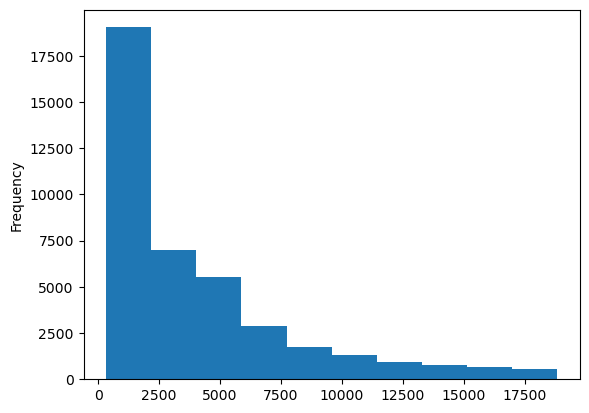

In [59]:
df['price'].plot(kind ='hist'
                    )

<Axes: >

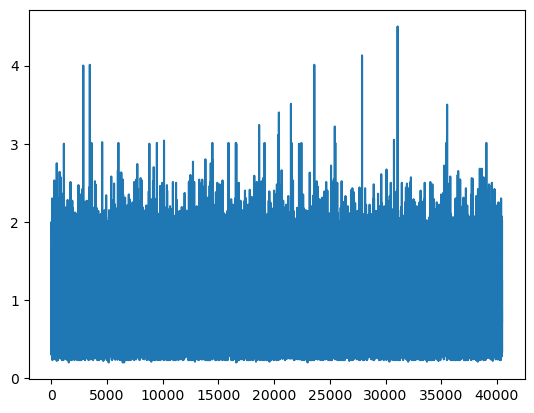

In [61]:
df['carat'].plot(kind = 'line')

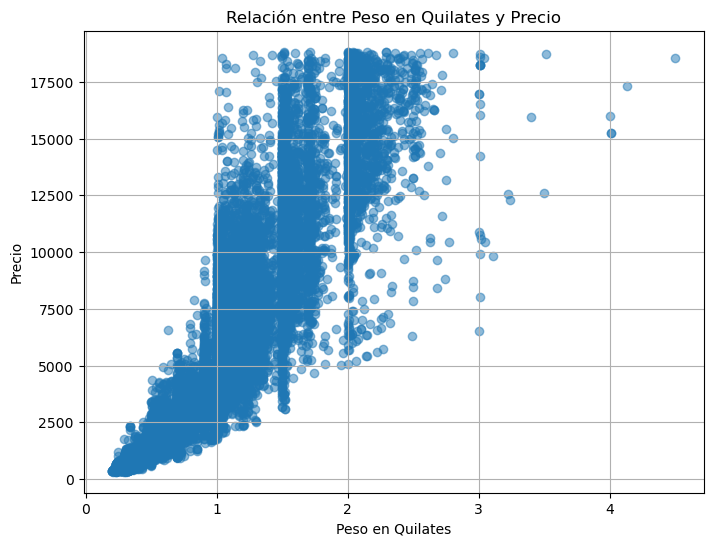

In [26]:


plt.figure(figsize=(8, 6))
plt.scatter(df['carat'], df['price'], alpha=0.5)
plt.title('Relación entre Peso en Quilates y Precio')
plt.xlabel('Peso en Quilates')
plt.ylabel('Precio')
plt.grid(True)
plt.show()

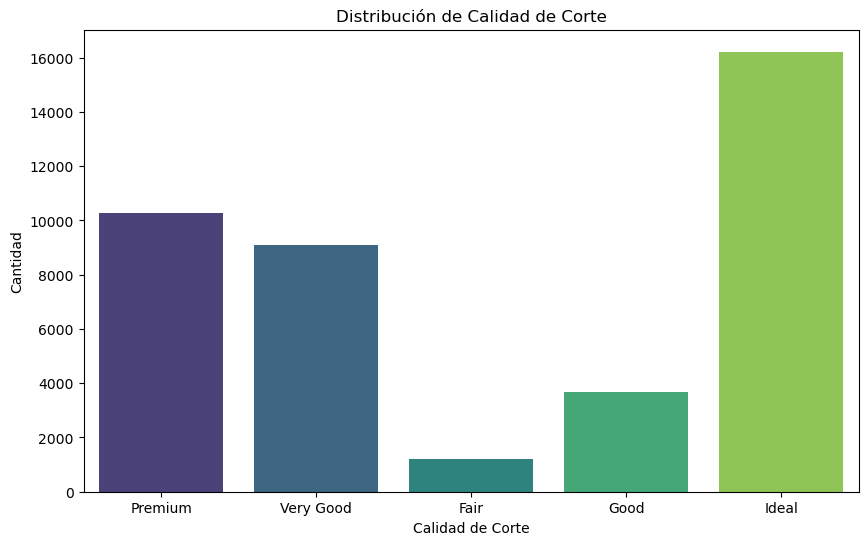

In [27]:

plt.figure(figsize=(10, 6))
sns.countplot(x='cut', data=df, palette='viridis')
plt.title('Distribución de Calidad de Corte')
plt.xlabel('Calidad de Corte')
plt.ylabel('Cantidad')
plt.show()

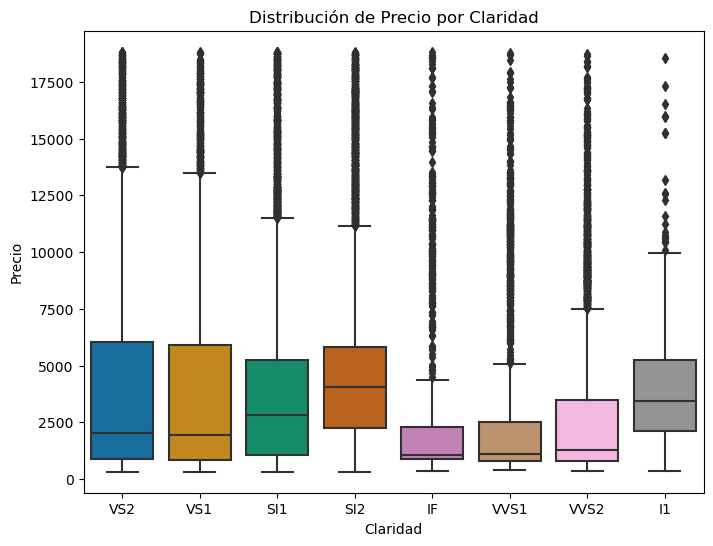

In [28]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='clarity', y='price', data=df, palette='colorblind')
plt.title('Distribución de Precio por Claridad')
plt.xlabel('Claridad')
plt.ylabel('Precio')
plt.show()

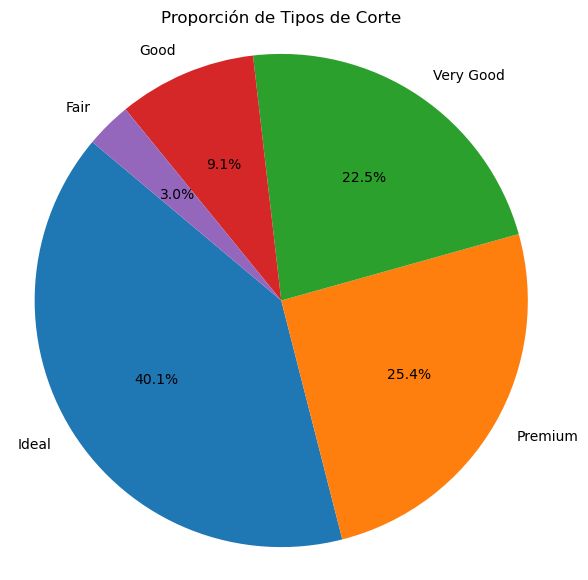

In [29]:
cut_counts = df['cut'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(cut_counts, labels=cut_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proporción de Tipos de Corte')
plt.axis('equal')
plt.show()

In [56]:
new_df.corr()

depth     table         x         y         z     carat     price
depth  1.000000 -0.207423  0.120573  0.176817  0.343559  0.245007  0.185318
table -0.207423  1.000000  0.081589  0.076861  0.030883  0.158647  0.250020
x      0.120573  0.081589  1.000000  0.966152  0.954607  0.962770  0.838183
y      0.176817  0.076861  0.966152  1.000000  0.958875  0.928864  0.812805
z      0.343559  0.030883  0.954607  0.958875  1.000000  0.935221  0.761942
carat  0.245007  0.158647  0.962770  0.928864  0.935221  1.000000  0.885685
price  0.185318  0.250020  0.838183  0.812805  0.761942  0.885685  1.000000

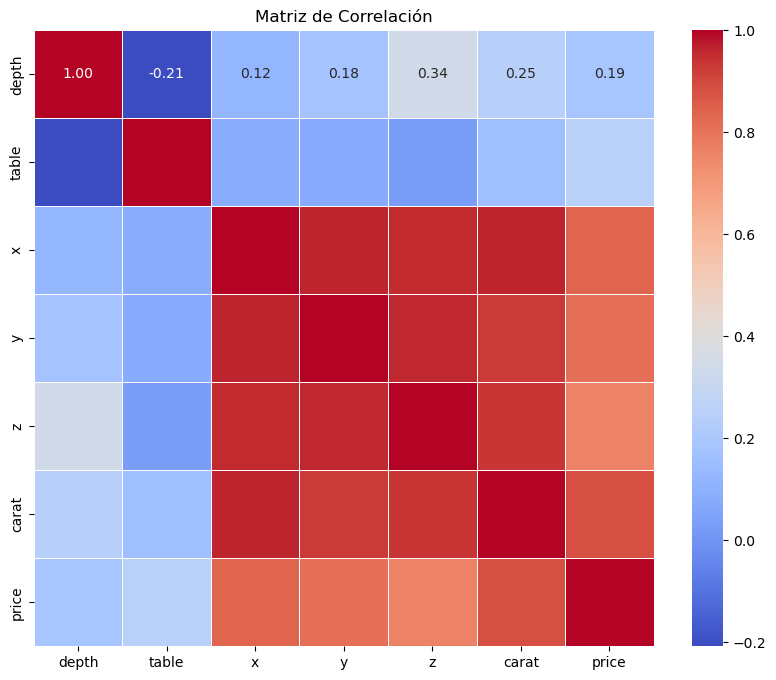

In [52]:
# Correlation matrix heatmap => https://seaborn.pydata.org/generated/seaborn.heatmap.html

plt.figure(figsize=(10, 8))
sns.heatmap(new_df.corr(),annot = True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

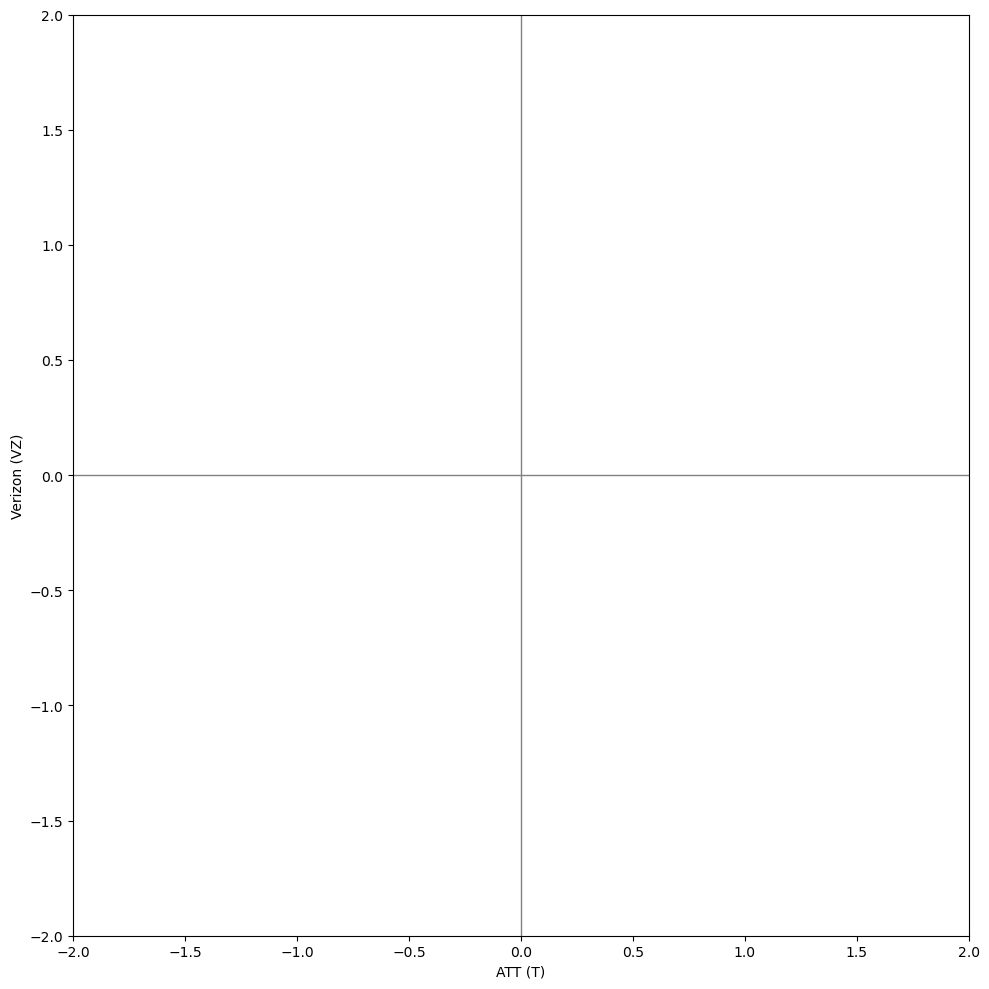

In [58]:
# Scatterplots (dominant quadrants give correlation info)

ax = new_df.plot.scatter(x='x',
                          y='y',
                          figsize=(10, 10),
                          marker='$\u25EF$',
                          alpha=1)
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.tight_layout()